<a href="https://colab.research.google.com/github/williansmprimo/visao_computacional/blob/main/reconhecimento_base_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
%matplotlib inline

In [ ]:
class_names = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
model_size = (x_train[0].shape[0], x_train[0].shape[1], x_train[0].shape[2])  #32, 32, 3
layer_size = 1024
out_size = class_names.shape[0]

x_test_original = x_test
x_train = x_train / 255
x_test = x_test / 255
model_size

(32, 32, 3)

In [ ]:
from warnings import filters
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation=tf.keras.activations.relu, input_shape=model_size))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation=tf.keras.activations.relu, input_shape=model_size))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=layer_size, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=out_size, activation=tf.keras.activations.softmax))
model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics='sparse_categorical_accuracy')
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense_9 (Dense)             (None, 1024)             

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 175s 111ms/step - loss: 1.3226 - sparse_categorical_accuracy: 0.5261
Epoch 2/5
1563/1563 [==============================] - 170s 109ms/step - loss: 0.9409 - sparse_categorical_accuracy: 0.6709
Epoch 3/5
1563/1563 [==============================] - 171s 109ms/step - loss: 0.7522 - sparse_categorical_accuracy: 0.7378
Epoch 4/5
1563/1563 [==============================] - 172s 110ms/step - loss: 0.5967 - sparse_categorical_accuracy: 0.7920
Epoch 5/5
1563/1563 [==============================] - 170s 109ms/step - loss: 0.4474 - sparse_categorical_accuracy: 0.8439


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 7s 23ms/step - loss: 0.9565 - sparse_categorical_accuracy: 0.7050


[0.9564733505249023, 0.7049999833106995]

In [ ]:
i = 60

1/1 [==============================] - 0s 39ms/step
result: 7, expected: 7, class: horse



array([[9.4235580e-14, 7.5929463e-16, 3.2653188e-12, 9.9163643e-11,
        1.9596225e-04, 2.3132772e-08, 2.0983771e-14, 9.9980408e-01,
        3.9378657e-14, 1.2182013e-14]], dtype=float32)

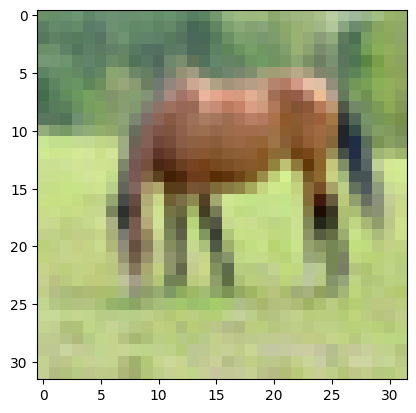

In [ ]:
result = model.predict(x_test[i:i+1])
plt.imshow(x_test_original[i])
result_idx = np.argmax(result)
print(f'result: {result_idx}, expected: {y_test[i][0]}, class: {class_names[result_idx]}')
print()
result

In [ ]:
test = np.array([[1, 2], [3, 4]])
test[1:2]

array([[3, 4]])